⭐ 4️⃣ ARIMA (AR + I + MA)
Where:

p = AR terms

d = Differencing (removes trend)

q = MA terms

📌 Example:
If stock prices trend upward over months:
→ Use differencing (d=1) to stabilize.

When to use:
Non-stationary data with trend.

                                  Open         High          Low        Close  \
Date                                                                            
2024-01-01 00:00:00+05:30  1078.368009  1078.368009  1060.770676  1064.812622   
2024-01-02 00:00:00+05:30  1070.974097  1087.437802  1064.221074  1082.212769   
2024-01-03 00:00:00+05:30  1082.409874  1083.543621  1067.375718  1069.593872   
2024-01-04 00:00:00+05:30  1072.699249  1112.626021  1070.776898  1109.619263   
2024-01-05 00:00:00+05:30  1109.077063  1115.140042  1101.239634  1107.056030   
...                                ...          ...          ...          ...   
2024-12-27 00:00:00+05:30   895.364086   904.694956   892.386157   901.270325   
2024-12-30 00:00:00+05:30   901.270301   905.290494   892.088353   896.853027   
2024-12-31 00:00:00+05:30   892.386134   910.402630   886.529515   907.970642   
2025-01-01 00:00:00+05:30   906.283137   915.713246   904.297850   913.529419   
2025-01-02 00:00:00+05:30   

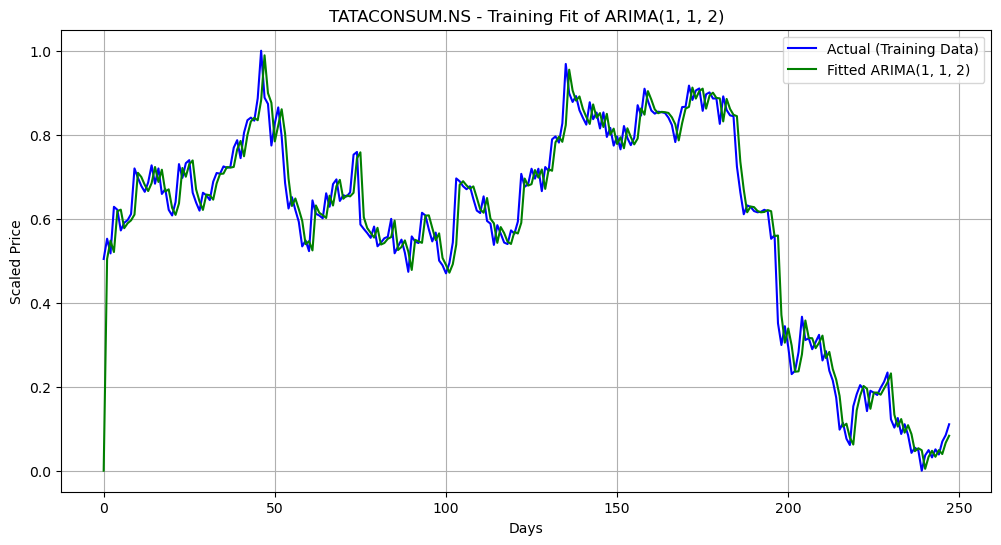


📈 NEXT 30 DAYS FORECAST (SCALED VALUES)

Day +1: 0.1082
Day +2: 0.1085
Day +3: 0.1087
Day +4: 0.1089
Day +5: 0.1090
Day +6: 0.1091
Day +7: 0.1091
Day +8: 0.1092
Day +9: 0.1092
Day +10: 0.1092
Day +11: 0.1093
Day +12: 0.1093
Day +13: 0.1093
Day +14: 0.1093
Day +15: 0.1093
Day +16: 0.1093
Day +17: 0.1093
Day +18: 0.1093
Day +19: 0.1093
Day +20: 0.1093
Day +21: 0.1093
Day +22: 0.1093
Day +23: 0.1093
Day +24: 0.1093
Day +25: 0.1093
Day +26: 0.1093
Day +27: 0.1093
Day +28: 0.1093
Day +29: 0.1093
Day +30: 0.1093


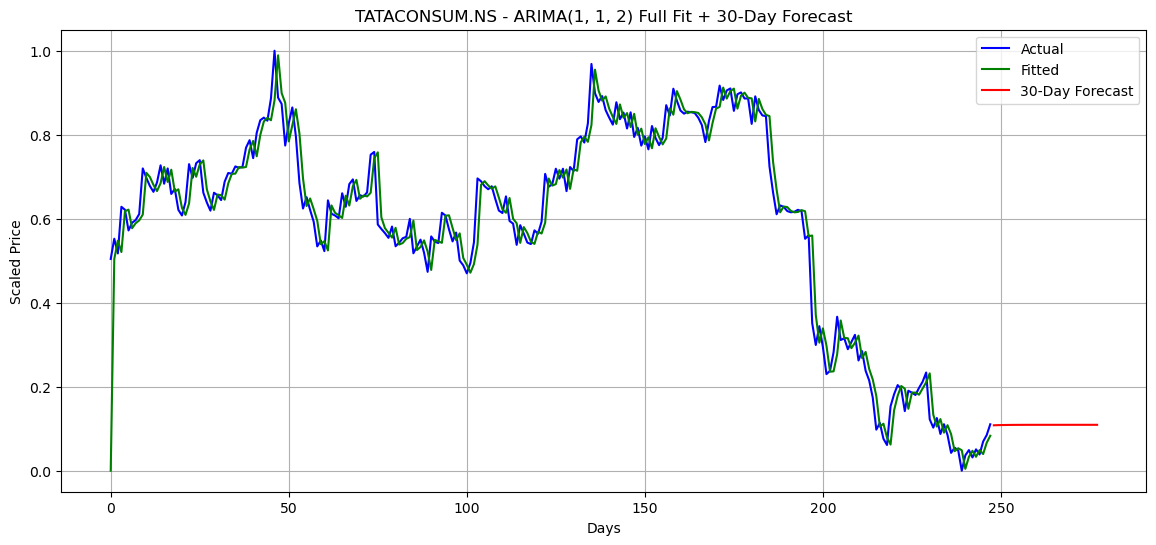

In [2]:
# ========================================================
# 0️⃣ IMPORT LIBRARIES
# ========================================================
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# ========================================================
# 1️⃣ DOWNLOAD DATA
# ========================================================
ticker = yf.Ticker("TATACONSUM.NS")
stk_data = ticker.history(start="2024-01-01", end="2025-01-03")

print(stk_data)
stk_data.info()


# ========================================================
# 2️⃣ NORMALIZATION (MinMaxScaler)
# ========================================================
column = "Close"
Ms = MinMaxScaler()

data1 = Ms.fit_transform(stk_data[[column]])
data1 = data1.flatten()     # ARIMA needs 1D array

print("Len:", data1.shape)


# ========================================================
# Function to compute RMSE + MAPE
# ========================================================
def rmsemape(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    print(f"RMSE : {rmse:.6f}")
    print(f"MAPE : {mape:.6f}")
    print("------------------------------")


# ========================================================
# 3️⃣ DEFINE ARIMA ORDERS
# ========================================================
orders = [(1,1,1), (1,1,2), (2,3,1), (2,2,2)]

results = []

print("\n==============")
print("Testing ARIMA Models")
print("==============\n")


# ========================================================
# 4️⃣ LOOP THROUGH ARIMA MODELS
# ========================================================
for order in orders:
    
    print(f"Testing ARIMA{order} ...")
    
    try:
        model = ARIMA(data1, order=order)
        model_fit = model.fit()

        # Predict entire dataset
        y_pred = model_fit.predict(0, len(data1)-1)

        # Performance
        rmse = np.sqrt(mean_squared_error(data1, y_pred))
        mape = mean_absolute_percentage_error(data1, y_pred)

        print(f"Order={order}, RMSE={rmse:.6f}, MAPE={mape:.6f}")
        print("----------------------------------")

        results.append({
            'order': order,
            'rmse': rmse,
            'mape': mape
        })

    except Exception as e:
        print(f"Model failed for order {order}: {e}")
        print("----------------------------------")


# ========================================================
# 5️⃣ SELECT BEST ARIMA MODEL
# ========================================================
best_model = min(results, key=lambda x: x['rmse'])

print("\n============================")
print("BEST ARIMA MODEL (FULL DATA)")
print("============================")
print(f"Order : {best_model['order']}")
print(f"RMSE  : {best_model['rmse']:.6f}")
print(f"MAPE  : {best_model['mape']:.6f}")


# ========================================================
# 6️⃣ TRAINING FIT (PLOT ACTUAL vs FITTED)
# ========================================================
best_order = best_model["order"]

# Refit using best model
model = ARIMA(data1, order=best_order)
model_fit = model.fit()

# Predict full series
fitted = model_fit.predict(0, len(data1)-1)

# Convert for plotting
actual = np.array(data1)
predicted = np.array(fitted)

plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual (Training Data)", color="blue")
plt.plot(predicted, label=f"Fitted ARIMA{best_order}", color="green")

plt.title(f"TATACONSUM.NS - Training Fit of ARIMA{best_order}")
plt.xlabel("Days")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid()
plt.show()


# ========================================================
# 7️⃣ FORECAST NEXT 30 DAYS
# ========================================================
future_steps = 30

future_pred_scaled = model_fit.predict(
    start=len(data1),
    end=len(data1) + future_steps - 1
)

future_pred_scaled = future_pred_scaled.reshape(-1)

print("\n============================")
print("📈 NEXT 30 DAYS FORECAST (SCALED VALUES)")
print("============================\n")
for i, val in enumerate(future_pred_scaled):
    print(f"Day +{i+1}: {val:.4f}")


# ========================================================
# 8️⃣ COMBINED PLOT — Actual + Fitted + Forecast
# ========================================================
plt.figure(figsize=(14,6))

# Actual series
plt.plot(actual, label="Actual", color="blue")

# Fitted
plt.plot(predicted, label="Fitted", color="green")

# Future forecast
forecast_index = range(len(actual), len(actual) + future_steps)
plt.plot(forecast_index, future_pred_scaled, label="30-Day Forecast", color="red")

plt.title(f"TATACONSUM.NS - ARIMA{best_order} Full Fit + 30-Day Forecast")
plt.xlabel("Days")
plt.ylabel("Scaled Price")
plt.legend()
plt.grid()
plt.show()
